In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [4]:

# Load the fact table (the prepared report data)
fact_table = pd.read_csv('fact_table.csv')

# Display the first few rows of the fact table to inspect the data
fact_table.head()


,userId,total_courses_completed,total_time_spent,average_score,role,department,total_feedback,latest_feedback_time
0,1,17,1982,54.105263,admin,testing,6.0,2024-10-11 01:28:22
1,2,10,982,44.545455,user,devops,5.0,2024-08-30 17:22:19
2,3,12,1339,42.583333,user,devops,4.0,2024-10-12 15:55:43
3,4,13,1752,56.600000,admin,full-stack,5.0,2024-10-01 12:30:07
4,5,11,1505,56.000000,user,full-stack,5.0,2024-09-23 10:12:35


In [6]:
# EDA: Exploring Data
def perform_eda(df):
    # Summary statistics
    print("\nSummary Statistics:\n", df.describe())

    # Null values check
    print("\nMissing Values:\n", df.isnull().sum())

    # Distribution of numeric variables
    df.hist(bins=15, figsize=(15, 10))
    plt.show()

    # Filter for numeric columns only
    numeric_df = df.select_dtypes(include=['float64', 'int64'])

    # Correlation heatmap for numeric columns
    plt.figure(figsize=(10, 6))
    sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
    plt.title("Correlation Heatmap")
    plt.show()

    # Boxplot for distribution of total_time_spent by average_score
    plt.figure(figsize=(8, 5))
    sns.boxplot(x='average_score', y='total_time_spent', data=df)
    plt.title("Boxplot: Time Spent vs Score")
    plt.show()

    # Scatter plot for score vs time spent
    plt.figure(figsize=(8, 5))
    sns.scatterplot(x='average_score', y='total_time_spent', data=df, hue='total_courses_completed')
    plt.title("Scatterplot: Time Spent vs Score with Courses Completed")
    plt.show()

    # Distribution of user engagement (using total_time_spent and average_score)
    plt.figure(figsize=(8, 5))
    sns.kdeplot(df['total_time_spent'], label="Time Spent", shade=True)
    sns.kdeplot(df['average_score'], label="Average Score", shade=True)
    plt.title("Distribution of Time Spent and Scores")
    plt.legend()
    plt.show()



Summary Statistics:
            userId  total_courses_completed  total_time_spent  average_score  \
count  200.000000               200.000000        200.000000     200.000000   
mean   100.500000                13.975000       1780.595000      50.385265   
std     57.879185                 3.662162        550.652697       7.419550   
min      1.000000                 6.000000        664.000000      31.153846   
25%     50.750000                11.000000       1423.250000      45.281818   
50%    100.500000                14.000000       1714.500000      50.300905   
75%    150.250000                17.000000       2119.250000      55.737500   
max    200.000000                23.000000       3236.000000      72.111111   

       total_feedback  
count      195.000000  
mean         5.128205  
std          2.186881  
min          1.000000  
25%          4.000000  
50%          5.000000  
75%          6.000000  
max         11.000000  

Missing Values:
 userId                     0
tot

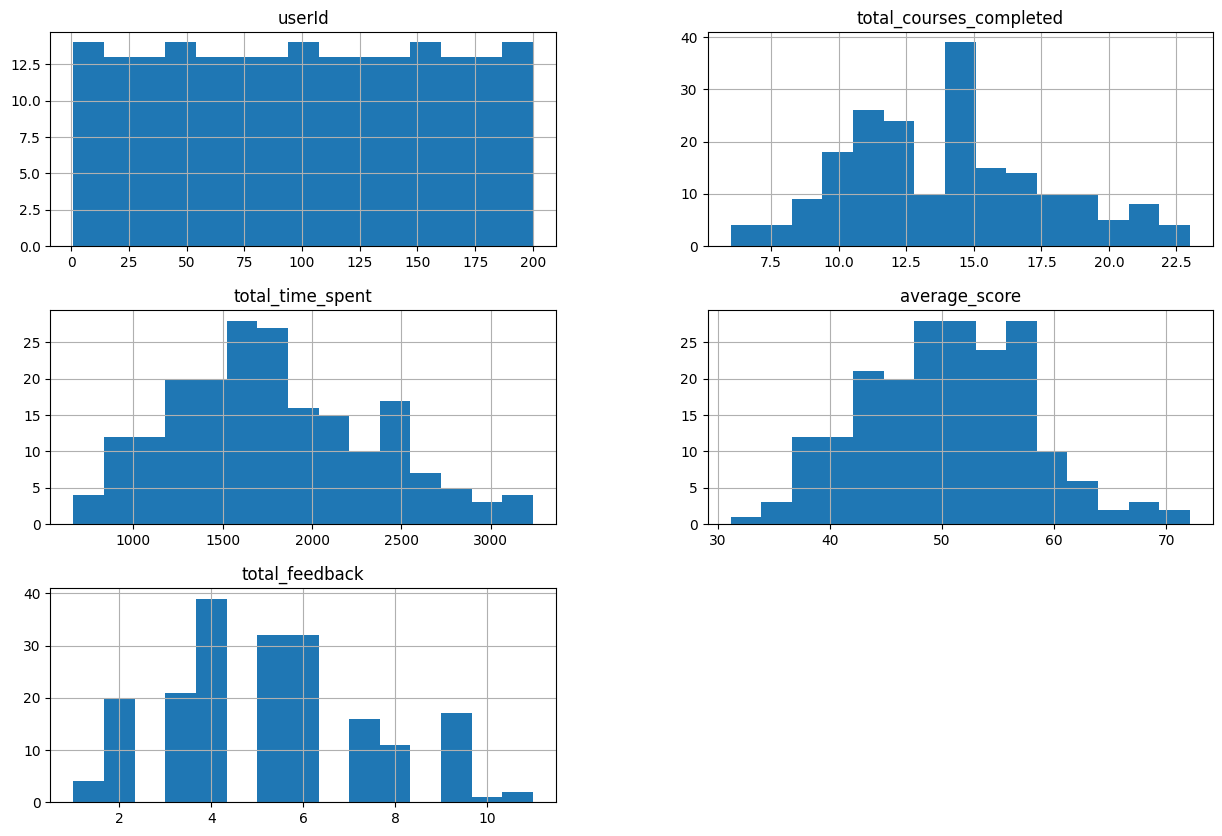

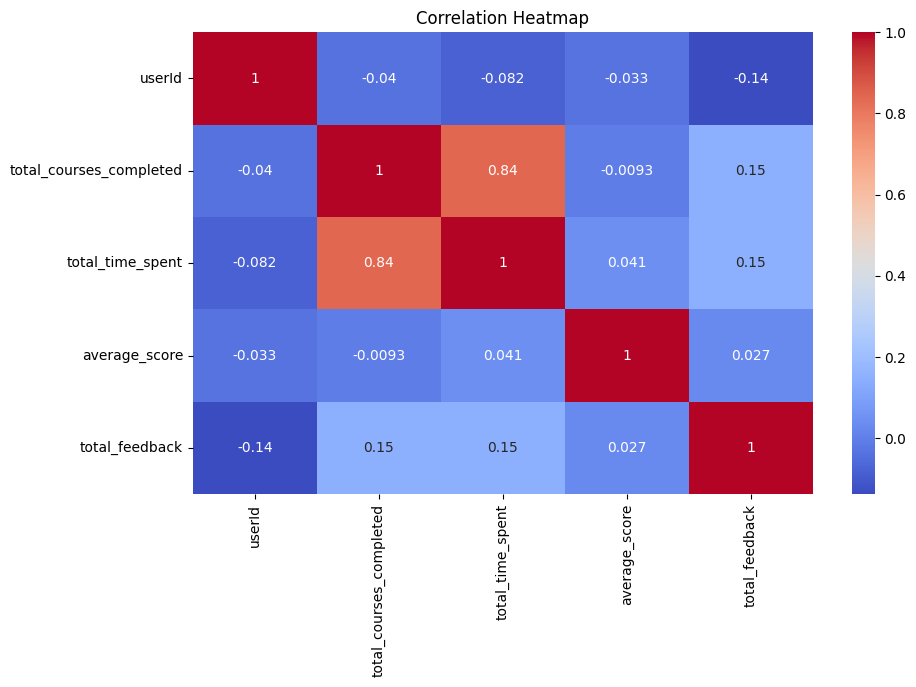

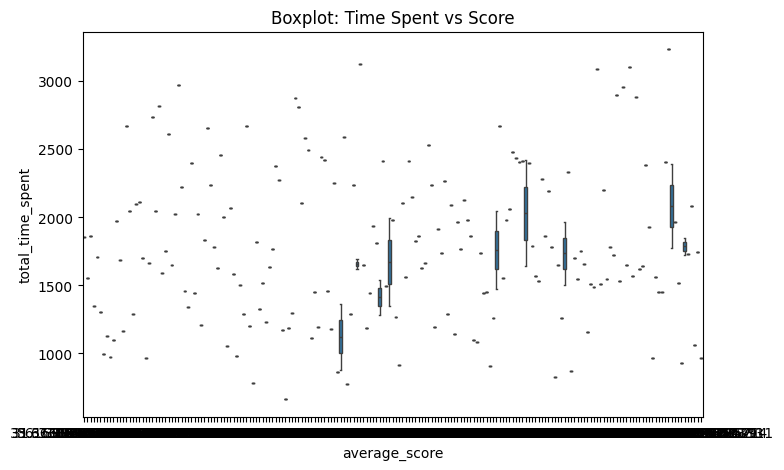

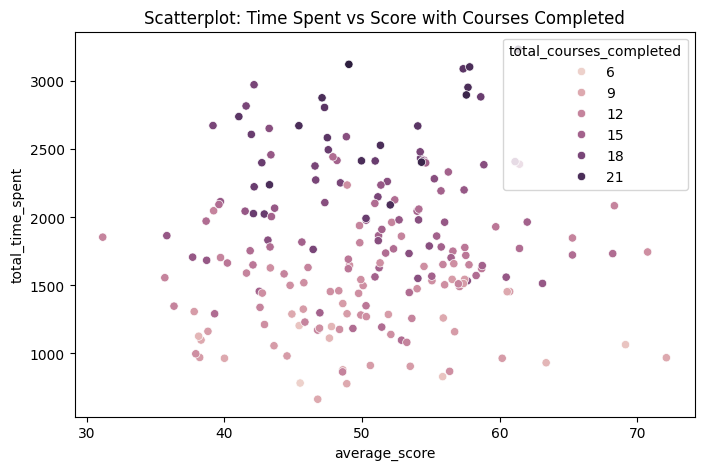

C:\Users\Vasanthakumar\AppData\Local\Temp\ipykernel_19364\4078176624.py:36: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['total_time_spent'], label="Time Spent", shade=True)
C:\Users\Vasanthakumar\AppData\Local\Temp\ipykernel_19364\4078176624.py:37: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['average_score'], label="Average Score", shade=True)


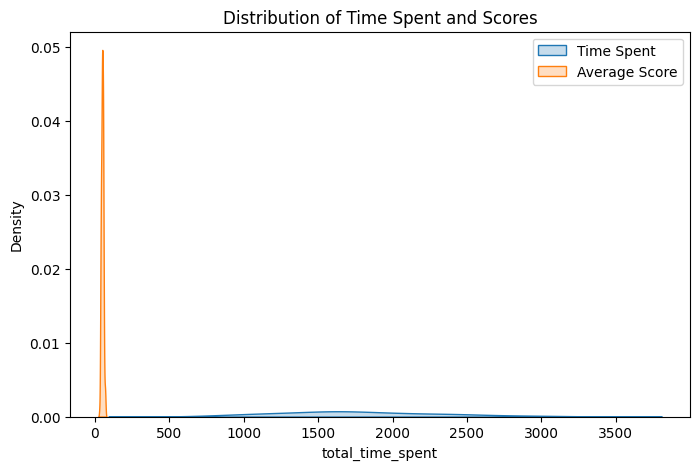

In [7]:
# Call the EDA function to perform exploratory data analysis
perform_eda(fact_table)
